Name: Robvic Matthew C. Gonan<br>
Course and Section: CPE019 - CPE32S3<br>
Date of Submission: 02/07/2024<br>
Instructor: Engr. Roman Richard<br>

<b>Objectives</b><br>
Part 1: The Dataset <br>
Part 2: Scatterplot Graphs and Correlatable Variables <br>
Part 3: Calculating Correlation with Python <br>
Part 4: Visualizing <br>

**PART 1**

<b>Part 1: The Dataset<b>

Step 1: Loading the Dataset From a File.<br>
Before the dataset can be used, it must be loaded onto memory.
In the code below, The first line imports the
pandas
modules and defines
pd
as a descriptor that refers tothe module.
The second line loads the dataset CSV file into a variable called
brainFile
.<br>
<br>
The third line uses
read_csv()
, a
pandas
method, to convert the CSV dataset stored in
brainFile
into adataframe. The dataframe is then stored in the
brainFrame
variable.

In [ ]:
# Code cell 1
import pandas as pd
brainFile = "/content/brainsize.txt"
brainFrame = pd.read_csv(brainFile, '\t')

<ipython-input-14-7ce539df1476>:4: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  brainFrame = pd.read_csv(brainFile, '\t')


Step 2: Verifying the dataframe.<br><br>
To make sure the dataframe has been correctly loaded and created, use the
head()
method. AnotherPandas method,
head()
displays the first five entries of a dataframe.

In [ ]:
 # Code cell 2
 #head is to print data in the data set
brainFrame.head(40) #if no indication the shown will be set 5

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545
5,Female,99,90,110,146.0,69.0,928799
6,Female,138,136,131,138.0,64.5,991305
7,Female,92,90,98,175.0,66.0,854258
8,Male,89,93,84,134.0,66.3,904858
9,Male,133,114,147,172.0,68.8,955466


<b>Part 2: Scatterplot Graphs and Correlatable Variables

Step 1: The pandas<br><br>
describe()
method.
The pandas module includes the
describe()
method which performs same common calculationsagainst a given dataset. In addition to provide common results including count, mean, standarddeviation, minimum, and maximum,
describe()
is also a great way to quickly test the validity of thevalues in the dataframe.


In [ ]:
# Code cell 3
#To summirize the data
brainFrame.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


Step 2: Scatterplot graphs<br><br>
Scatterplot graphs are important when working with correlations as they allow for a quick visualverification of the nature of the relationship between the variables. This lab uses the Pearson correlationcoefficient, which is sensitive only to a linear relationship between two variables. Other more robustcorrelation methods exist but are out of the scope of this lab.

a. Load the required modules.<br><br>
Before graphs can be plotted, it is necessary to import a few modules, namely
numpy
and
matplotlib
.

In [ ]:
 # Code cell 4
import numpy as np
import matplotlib.pyplot as plt

b. Separate the data.<br><br>
To ensure the results do not get skewed because of the differences in male and female bodies, thedateframe is split into two dataframes: one containing all male entries and another with only femaleinstances.

In [ ]:
# Code cell 5
menDf = brainFrame[(brainFrame.Gender == 'Male')]
womenDf = brainFrame[(brainFrame.Gender == 'Female')]

c. Plot the graphs.<br><br>
Because the dataset includes three different measures of intelligence (PIQ, FSIQ, and VIQ), the first linebelow uses Pandas
mean()
method to calculate the mean value between the three and store the result inthe
menMeanSmarts
variable. Notice that the first line also refers to the menDf, the filtered dataframecontaining only male entries.<br><br>
The second line uses the
matplotlib
method
scatter()
to create a scatterplot graph between the
menMeanSmarts
variable and the
MRI_Count
attribute. The MRI_Count in this dataset can be thought as ofa measure of the physical size of the subjects' brains.<br><br>
The third line simply displays the graph.<br><br>
The fourth line is used to ensure the graph will be displayed in this notebook.

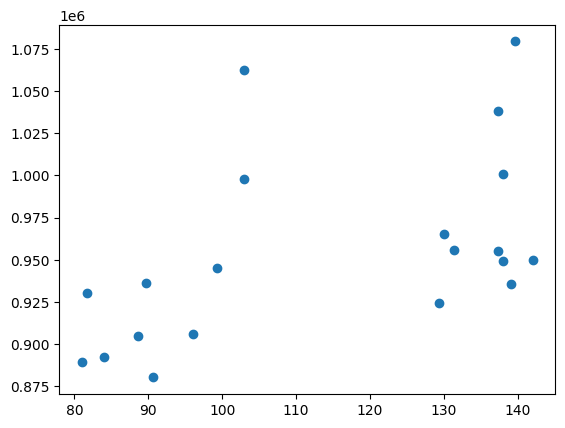

In [ ]:
# Code cell 6
menMeanSmarts = menDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(menMeanSmarts, menDf["MRI_Count"])
plt.show()
%matplotlib inline

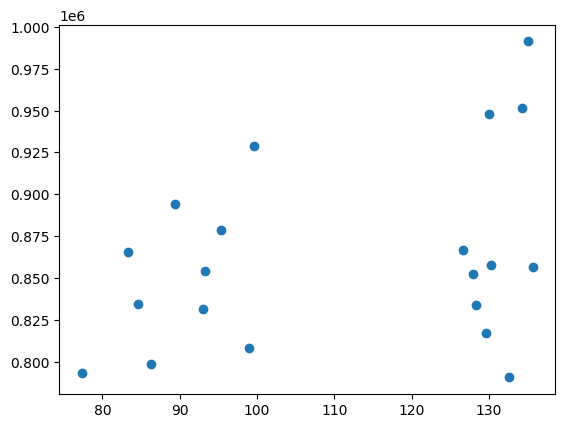

In [ ]:
 # Code cell 7
# Graph the women-only filtered dataframe
#womenMeanSmarts = ?
#plt.scatter(?, ?)

womenMeanSmarts = womenDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(womenMeanSmarts, womenDf["MRI_Count"])
plt.show()
%matplotlib inline

<b>Part 3: Calculating Correlation with Python

Step 1: Calculate correlation against brainFrame.
The pandas<br><br>
corr()
method provides an easy way to calculate correlation against a dataframe. By simplycalling the method against a dataframe, one can get the correlation between all variables at the sametime.

In [ ]:
#line 8
brainFrame.corr(method='pearson')

<ipython-input-20-7f611457cf00>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  brainFrame.corr(method='pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.051483,-0.086002,0.357641
VIQ,0.946639,1.000000,0.778135,-0.076088,-0.071068,0.337478
PIQ,0.934125,0.778135,1.000000,0.002512,-0.076723,0.386817
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.086002,-0.071068,-0.076723,0.699614,1.000000,0.601712
MRI_Count,0.357641,0.337478,0.386817,0.513378,0.601712,1.000000


Notice at the left-to-right diagonal in the correlation table generated above. Why is the diagonal filledwith 1s? Is that a coincidence? Explain.

**-No, It is not a coicidence Because the correlation between the variable itself is always 1.**

Using the same
corr()
method, it is easy to calculate the correlation of the variables contained in thefemale-only dataframe:

In [ ]:
 # Code cell 9
 #can use other methods like spearman
 #The default is pearson even if the method is left blank
womenDf.corr(method='pearson')

<ipython-input-21-67fbce7e6884>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  womenDf.corr(method='pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.955717,0.939382,0.038192,-0.059011,0.325697
VIQ,0.955717,1.000000,0.802652,-0.021889,-0.146453,0.254933
PIQ,0.939382,0.802652,1.000000,0.113901,-0.001242,0.396157
Weight,0.038192,-0.021889,0.113901,1.000000,0.552357,0.446271
Height,-0.059011,-0.146453,-0.001242,0.552357,1.000000,0.174541
MRI_Count,0.325697,0.254933,0.396157,0.446271,0.174541,1.000000


In [ ]:
# Code cell 10
# Use corr() for the male-only dataframe with the pearson method
menDf.corr(method = 'pearson')

<ipython-input-22-e6099c4c20d5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  menDf.corr(method = 'pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.944400,0.930694,-0.278140,-0.356110,0.498369
VIQ,0.944400,1.000000,0.766021,-0.350453,-0.355588,0.413105
PIQ,0.930694,0.766021,1.000000,-0.156863,-0.287676,0.568237
Weight,-0.278140,-0.350453,-0.156863,1.000000,0.406542,-0.076875
Height,-0.356110,-0.355588,-0.287676,0.406542,1.000000,0.301543
MRI_Count,0.498369,0.413105,0.568237,-0.076875,0.301543,1.000000


<b>Part 4: Visualizing

Step 1: Install Seaborn.<br><br>
To make it easier to visualize the data correlations, heatmap graphs can be used. Based on coloredsquares, heatmap graphs can help identify correlations in a glance.<br><br>
The Python module named
seaborn
makes it very easy to plot heatmap graphs.<br><br>

In [ ]:
# Code cell 11
!pip install seaborn

Step 2: Plot the correlation heatmap.<br><br>
Now that the dataframes are ready, the heatmaps can be plotted. Below is a breakdown of the code in thecell below:<br>
Line 1: Generates a correlation table based on the
womenNoGenderDf
dataframe and stores it on
wcorr
.<br>
Line 2: Uses the
seaborn
heatmap()
method to generate and plot the heatmap. Notice that
heatmap()
takes
wcorr
as a parameter.<br>
Line 3: Use to export and save the generated heatmap as a PNG image. While the line 3 is not active (ithas the comment
#
character preceding it, forcing the interpreter to ignore it), it was kept forinformational purposes.

<ipython-input-23-2465c40f5efb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wcorr = womenDf.corr()


<Axes: >

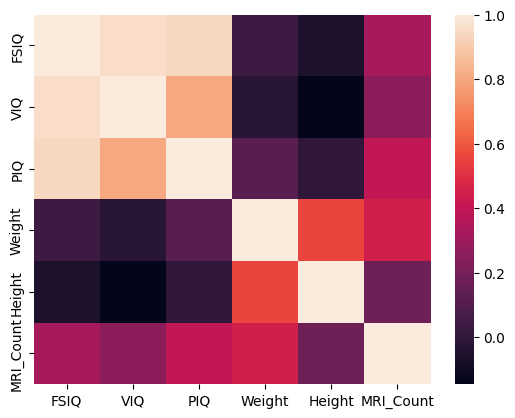

In [ ]:
 # Code cell 12
import seaborn as sns
wcorr = womenDf.corr()
sns.heatmap(wcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

<ipython-input-24-ff3e250059fc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mcorr = menDf.corr()


<Axes: >

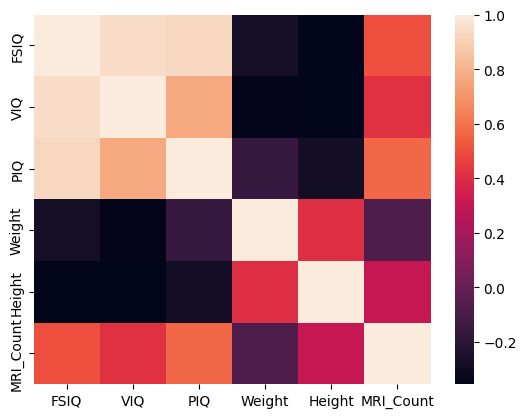

In [ ]:
 # Code cell 14
mcorr = menDf.corr()
sns.heatmap(mcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

Many variable pairs present correlation close to zero. What does that mean?

**-There are 12 for women and 12 for men. The pairs of data that are close to zero means that the paired varible have little to no correlation to each other, in this case the heigth and weight of the person reagrdless of gender has no correlation to the intellect of the person.**

Why separate the genders?

**-To show and visualize if there is a correlation of IQ when it comes to genders.**

What variables have stronger correlation with brain size (MRI_Count)? Is that expected? Explain.

**-The varibles that have stronger correlation with brain size are PIQ, VIQ, and FSIQ. The data shows that the brain size and MRI count has middle level of correlation estemating at 0.2-0.4 out of 1. It shows that the brain size or the MRI size of a person has little to low impact on the intellegence of the person.**

<b>SUPPLEMENTARY

In [ ]:
# Code cell 1
import pandas as pd
insuranceFile = "/content/insu.txt"
insuranceFrame = pd.read_csv(insuranceFile, '\t')
insuranceFrame.head(40)

<ipython-input-64-a7fcbaed371f>:4: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  insuranceFrame = pd.read_csv(insuranceFile, '\t')


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
# Code cell 3
#To summirize the data
insuranceFrame.describe()

,age,bmi,children,charges
count,39.000000,39.000000,39.000000,39.000000
mean,36.307692,30.213590,0.871795,14369.950739
std,15.744930,5.784804,1.217839,14038.593242
min,18.000000,17.385000,0.000000,1137.011000
25%,23.000000,26.255000,0.000000,3265.906875
50%,31.000000,29.830000,0.000000,10602.385000
75%,53.500000,34.250000,1.000000,19434.697305
max,63.000000,42.130000,5.000000,51194.559140


In [ ]:
# Code cell 4
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Code cell 5
menDf = insuranceFrame[(insuranceFrame.sex == 'male')]
womenDf = insuranceFrame[(insuranceFrame.sex == 'female')]

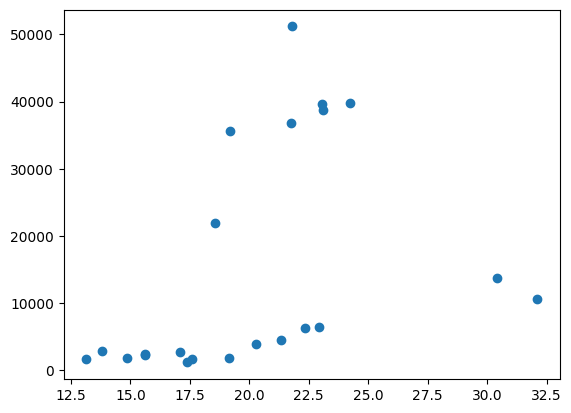

In [ ]:
menInsurance = menDf[["age", "bmi", "children"]].mean(axis=1)
plt.scatter(menInsurance, menDf["charges"])
plt.show()
%matplotlib inline

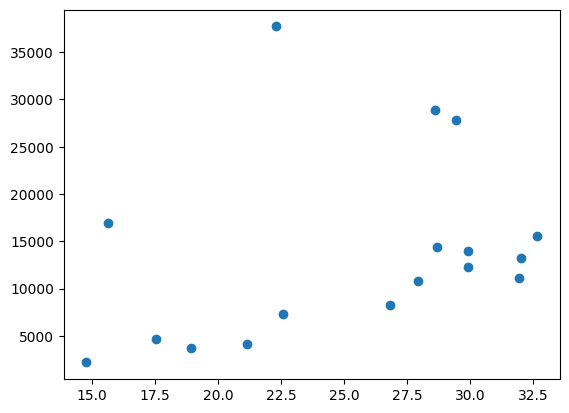

In [ ]:
womenmenInsurance = womenDf[["age", "bmi", "children"]].mean(axis=1)
plt.scatter(womenmenInsurance, womenDf["charges"])
plt.show()
%matplotlib inline

In [ ]:
# Code cell 8
insuranceFrame.corr(method='pearson')

<ipython-input-121-17628dbab956>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  insuranceFrame.corr(method='pearson')


,age,bmi,children,charges
age,1.000000,0.141860,0.032305,0.164162
bmi,0.141860,1.000000,0.041978,0.445798
children,0.032305,0.041978,1.000000,-0.085782
charges,0.164162,0.445798,-0.085782,1.000000


In [ ]:
insuranceFrame.corr(method='spearman')

<ipython-input-123-fd1e0c2a9b87>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  insuranceFrame.corr(method='spearman')


,age,bmi,children,charges
age,1.000000,0.091835,0.103308,0.510162
bmi,0.091835,1.000000,0.109767,0.393522
children,0.103308,0.109767,1.000000,0.070215
charges,0.510162,0.393522,0.070215,1.000000


In [ ]:
womenDf.corr(method='pearson')

<ipython-input-120-01fad84dd5db>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  womenDf.corr(method='pearson')


,age,bmi,children,charges
age,1.000000,0.184903,-0.139740,0.373161
bmi,0.184903,1.000000,0.030183,-0.061050
children,-0.139740,0.030183,1.000000,-0.232682
charges,0.373161,-0.061050,-0.232682,1.000000


In [ ]:
womenDf.corr(method='spearman')

<ipython-input-124-fd7f06a1ec99>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  womenDf.corr(method='spearman')


,age,bmi,children,charges
age,1.000000,-0.012277,-0.125650,0.584409
bmi,-0.012277,1.000000,0.276967,-0.051471
children,-0.125650,0.276967,1.000000,-0.155468
charges,0.584409,-0.051471,-0.155468,1.000000


In [ ]:
menDf.corr(method='pearson')

<ipython-input-119-4396b7a1db7e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  menDf.corr(method='pearson')


,age,bmi,children,charges
age,1.000000,0.211198,0.006773,0.143272
bmi,0.211198,1.000000,0.080792,0.586536
children,0.006773,0.080792,1.000000,0.015625
charges,0.143272,0.586536,0.015625,1.000000


In [ ]:
menDf.corr(method='spearman')

<ipython-input-125-9020b748c9da>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  menDf.corr(method='spearman')


,age,bmi,children,charges
age,1.000000,0.232032,0.170991,0.644031
bmi,0.232032,1.000000,0.068370,0.583286
children,0.170991,0.068370,1.000000,0.176994
charges,0.644031,0.583286,0.176994,1.000000


<ipython-input-113-6ca204a500d2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wcorr = womenDf.corr()


<Axes: >

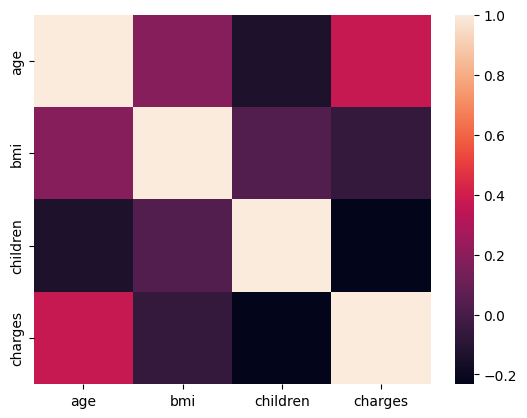

In [ ]:
import seaborn as sns
wcorr = womenDf.corr()
sns.heatmap(wcorr)


<ipython-input-111-9e53c3736ee3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wcorr = menDf.corr()


<Axes: >

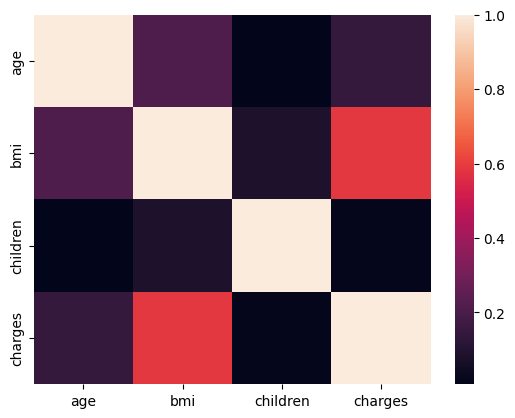

In [ ]:
import seaborn as sns
wcorr = menDf.corr()
sns.heatmap(wcorr)

**Supplementary Conclusion**

-As shown in the data above the correlation between children, bmi, and age when it comes to hospital insurance. This tells us that these varibles can be a factor to health insurance even if it is has low impact. It also suggest that according to the BMI of the subject it can affect the amount of insurance.

**CONLUSION**

-In conlusion, This activity has taught me the importance of correlation of data as it will be used for future activity and it is very useful. By using the seaborn, It help me visualize the correlation level of the data given and determine if the dataset has correlation to each present data in the dataset. And also i experimented with the two methods which is pearsons and spearmans. I learned that pearsons is more on linear changes in the dataset while the spearman is the opposite.